<a href="https://colab.research.google.com/github/marcosilvaa/dados_estudos/blob/main/Visualiza%C3%A7%C3%A3o_Gr%C3%A1fica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização Gráfica

Para um bom projeto de *DataScience*, a visualização gráfica é um dos requisitos mais importantes, uma vez que a função do gráfico é comunicar uma informação, deve ser feito de maneira clara e direta. 

Este notebook é uma sequência de tutoriais sobre como fazer os mais diversos tipos de gráficos, os dados utilizados são do curso *Data Science na Prática* do professor Carlos Melo da Familia [Sigmoidal](https://sigmoidal.ai). 


## Gráfico de Linhas 

O gráfico de linhas é formado por um conjunto de pontos conectados por segmentos de retas, utilizando de um eixo X (horizontal) e um eixo Y (vertical), este tipo gráfico é ideal para nos mostrar comportamento dos dados ao longo do tempo.


### Quando Usar? 
Para dados que se conectam e apresentam uma continuídade.

### Dicas

* Frequentemente o eixo X é uma unidade de tempo.

* Não faz sentido para variáveis categóricas

* Princípio da conexão de Gestalt
> "A Gestalt diz que elementos que estão visualmente conectados são percebidos como mais relacionados do que elementos sem conexão. Isso significa que 2 figuras idênticas em um layout, quando desconectadas, são vistas diferentemente do que as suas figuras disformes ligadas por uma linha.
De todos os princípios que sugerem que os objetos estão relacionados, a conexão uniforme tende a ser o mais forte."

### Plotando Gráfico de Linhas

Para este gráfico utilizaremos um conjunto de dados referentes ao número de casos mensais de dengue na cidade de Campinas-SP, dados referentes ao período de 1998 a 2015.

Este *dataset* contem informações como:
* Número de casos confirmados 
* Chuva
* Temperaturas (Mín, Méd, Máx)





In [2]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt

# importando dados
data = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df  = pd.read_csv(data, index_col = "data", parse_dates=True)

# conferindo as primeiras entradas
df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


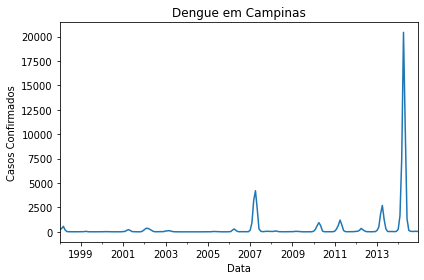

In [3]:
# plotando numero de casos confirmados
fig, ax = plt.subplots()

df['casos-confirmados'].plot(kind='line', ax=ax)
ax.set_title("Dengue em Campinas")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Data")

plt.tight_layout()

### Selecionando intervalos

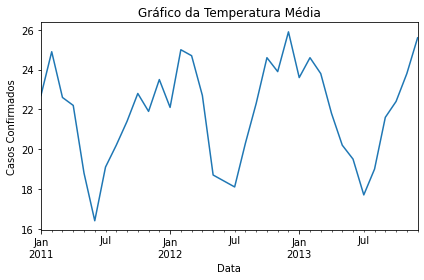

In [4]:
# plotando histograma da temperatura média
fig, ax = plt.subplots()
#              intervalo               data            plotando
df.loc['2011-01-01':'2013-12-31','temperatura-media'].plot(kind='line', ax=ax)
ax.set_title("Gráfico da Temperatura Média")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel('Data')

plt.tight_layout()

### Plotando múltiplos gráficos separadamente

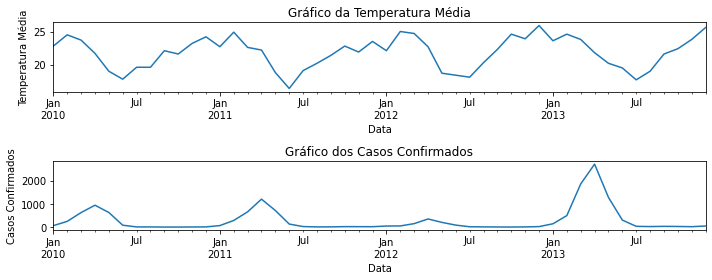

In [5]:
# plotar o histograma da temperatura média 
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,4))

# plotar temperatura média como ax0
df.loc['2010-01-01':'2013-12-31', 'temperatura-media'].plot(kind='line', ax=ax0)
ax0.set_title('Gráfico da Temperatura Média')
ax0.set_ylabel('Temperatura Média')
ax0.set_xlabel('Data')

# plotar casos confirmados como ax1
df.loc['2010-01-01':'2013-12-31', 'casos-confirmados'].plot(kind='line', ax=ax1)
ax1.set_title("Gráfico dos Casos Confirmados")
ax1.set_ylabel("Casos Confirmados")
ax1.set_xlabel("Data")

plt.tight_layout()

### Plotando múltiplos gráficos sobrepostos


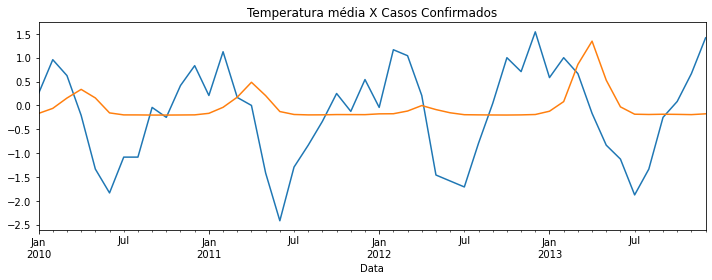

In [6]:
# plotando gráficos normalizados
df_norm = (df - df.mean()) / df.std()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

# plotar temperatura média
df_norm.loc['2010-01-01':'2013-12-31', 'temperatura-media'].plot(kind='line', ax=ax)

# plotar casos confirmados
df_norm.loc['2010-01-01':'2013-12-31', 'casos-confirmados'].plot(kind='line', ax=ax)

# nomeando eixo-x e title
ax.set_xlabel('Data')
ax.set_title('Temperatura média X Casos Confirmados')

plt.tight_layout()

## Histograma

Diferente de um gráfico de barras comum, o histograma é utilizado para demonstrar a distribuição de frequência ou a quantidade de um determinado ítem. 

Um histograma de valores absolutos, tem no eixo y a quantidade absoluta de ocorrências dos valores de cada classe. Já um histograma de dados de proporção, conhecido como histograma de área de unidade, exibe a proporção que cada classe representa no todo.


### Plotando o histograma
Vamos continuar utilizando os dados referentes aos casos de dengue em Campinas-SP.

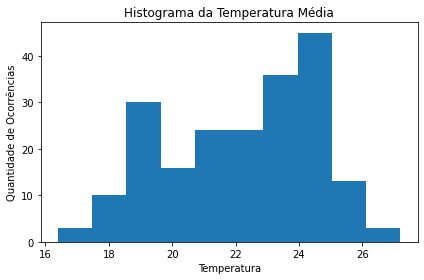

In [11]:
# plotar histograma para temperatura média

fig, ax = plt.subplots()

ax.hist("temperatura-media", data=df)
ax.set_title("Histograma da Temperatura Média")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Temperatura")

plt.tight_layout()

O histograma acima está representando os valores absolutos no eixo y. Para plotar em termos de frequência relativa, acrescenta-se density=True dentro da função.

A quantidade de barras (`bins`) tem seu valor padrão, porém pode ser alterada para buscar uma maior acurácia no resultado

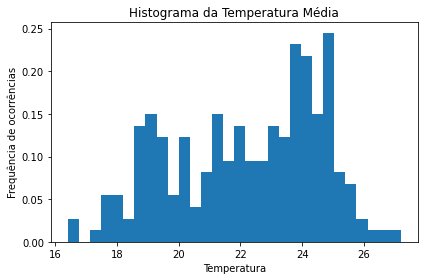

In [12]:
# plotar o histograma da temperatura média
fig, ax = plt.subplots()

# density altera os valores para o eixo y
ax.hist('temperatura-media', data=df, density=True, bins=30) 
ax.set_title("Histograma da Temperatura Média")
ax.set_ylabel("Frequência de ocorrências")
ax.set_xlabel("Temperatura")

plt.tight_layout()

## Gráfico de Barras

o Gráfico de barras diferente do histograma, indica atraves do comprimento ou altura, dependendo de sua orientação, um valor proporcional àquilo que busca representar, a particularidade do histograma é de representar o historico de um determinado evento, já no gráfico de barras a idéia é de apenas representar um valor.

De maneira simples, cumpre com seu papel de informar um dado de maneira direta porém discreta. Apresenta uma fácil interpretação do leitor, exige menos processamento de informação. 

O gráfico de barras parte de um ponto zero, podendo informar simultaneamente valores positivos e negativos, o que deve ser feito com cautela para que não fuja da sua simplicidade, uma vez que pode ser plotado com um número grande de barras e excesso de legendas.

### Plotando Gráfico de Barras

Para este exemplo, utilizaremos um conjunto de dados públicos referentes ao Metrô de São Paulo.

Este *dataset* assim como diversos outros podem ser encontrados no [Portal da Governança Corporativa e Transparência](https://transparencia.metrosp.com.br/). Neste portal é possível encontrar dados referentes à evolução de obras, gestão financeira, projetos futuros.

O *dataset* a ser utilizado é "Entrada de Passageiros por Estação - Média Dias Úteis - Dezembro/2018". Mesmo com os dados já disponíveis em `.csv`, foi necessário realizar um trabalho em cima das informações, e mais uma vez quem ficou responsável por este feito, foi o professor Carlos Melo da Familia [Sigmoidal](https://sigmoidal.ai), que nos disponibilizou o arquivo já estruturado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/entrada_passageiro_linha1.csv).



In [34]:
# importando pacotes   
import pandas as pd
import matplotlib.pyplot as plt

# importando os dados
data_metro = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/entrada_passageiro_linha1.csv"
df_metro = pd.read_csv(data_metro)

#conferindo as primeiras entradas
df_metro.head()

,Estação,Entradas
0,Jabaquara,90.0
1,Conceição,40.0
2,São Judas,20.0
3,Saúde,36.0
4,Praça da Árvore,22.0


In [35]:
# conferindo as ultimas entradas
df_metro.tail()

,Estação,Entradas
19,Santana,64.000
20,Jardim São Paulo-Ayrton Senna,14.000
21,Parada Inglesa,16.000
22,Tucuruvi,70.000
23,TOTAL,1.425


A ultima linha deste *dataset* informa o valor da soma total de todas as entradas, o que não nos trás benefício para o exemplo em questão, portanto vamos apagá-la.

In [38]:
# apagando linha `TOTAL`
df_metro.drop(index=23, axis=0, inplace=True)

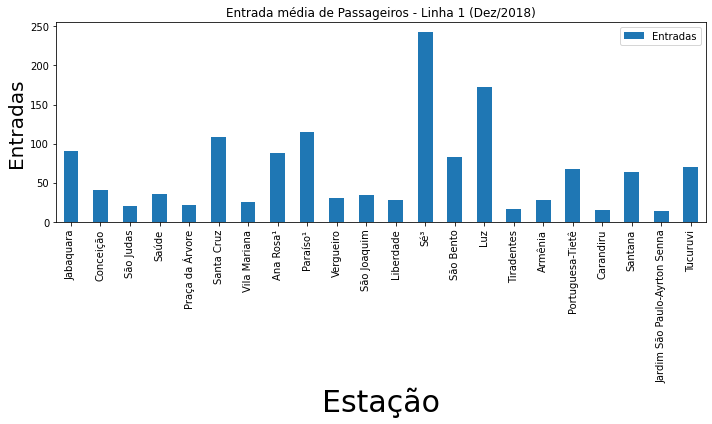

In [53]:
# plotando gráfico de barras com a entrada média dos passageiros
fig, ax = plt.subplots(figsize=(10,6))

df_metro.plot(x='Estação', y='Entradas', kind='bar', ax=ax)

ax.set_title("Entrada média de Passageiros - Linha 1 (Dez/2018)")
ax.set_xlabel("Estação", fontsize=30)
ax.set_ylabel("Entradas", fontsize=20)

plt.tight_layout()